<a href="https://colab.research.google.com/github/Sandanu87/Nextgen-Analytics-/blob/main/LGBM_GB_RF_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [82]:
data = pd.read_csv('cleaned_data.csv')

In [83]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0,13659.03


In [84]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encoded_data = encode.fit_transform(data['outlet_city'])

encoded_df = pd.DataFrame(encoded_data, columns=['outlet_city_encoded'])
data = pd.concat([data, encoded_df], axis=1)
data = data.drop('outlet_city', axis=1)

In [6]:
data.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,outlet_city_encoded
0,10493832.0,1209.60,756.00,5292.00,4.0,7257.60,11
1,10178643.0,1590.12,1060.08,6007.12,1.0,8657.32,13
2,10513916.0,2288.88,1481.04,9155.52,4.0,12925.44,19
3,10334589.0,2274.94,1739.66,9099.76,4.0,13114.36,19
4,10458365.0,2345.49,2069.55,9243.99,4.0,13659.03,11


In [68]:
data['outlet_city_encoded'].unique()

array([11, 13, 19,  5,  2, 16,  7, 17, 12, 15,  0,  1,  6,  4,  8,  3, 10,
       14, 18,  9])

In [69]:
data['outlet_city_encoded'].nunique()

20

In [7]:
x = data.drop('cluster_catgeory', axis=1)
y = data['cluster_catgeory']

In [8]:
print(x.shape)
print(y.shape)

(774146, 6)
(774146,)


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

In [10]:
x_train.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,total_sales,outlet_city_encoded
281861,10060471.0,1652.04,9086.22,2478.06,13216.32,5
413617,10461541.0,1299.98,2009.06,8036.24,11345.28,10
543369,10074813.0,1056.24,1584.36,5721.30,8361.90,1
379833,10260411.0,760.90,1445.71,5098.03,7304.64,6
244544,10153591.0,1314.24,7556.88,1752.32,10623.44,16


In [11]:
x_test.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,total_sales,outlet_city_encoded
325438,10314224.0,1321.98,8292.42,2043.06,11657.46,16
256814,10641484.0,1426.75,7133.75,1975.50,10536.00,5
256952,10470824.0,753.34,3551.46,914.77,5219.57,19
353046,10739673.0,3209.60,3309.90,3309.90,9829.40,11
620966,10707896.0,1193.76,4998.87,1119.15,7311.78,4


In [12]:
y_train.head()

,cluster_catgeory
281861,2.0
413617,1.0
543369,1.0
379833,1.0
244544,2.0


In [13]:
y_test.head()

,cluster_catgeory
325438,2.0
256814,2.0
256952,2.0
353046,5.0
620966,6.0


In [14]:
x_train.isnull().sum()


,0
Customer_ID,0
luxury_sales,0
fresh_sales,0
dry_sales,0
total_sales,0
outlet_city_encoded,0


In [15]:
from sklearn.preprocessing import RobustScaler

numeric_features = ['dry_sales', 'luxury_sales', 'fresh_sales', 'total_sales']

x_train_log = np.log1p(x_train[numeric_features])
x_test_log = np.log1p(x_test[numeric_features])

scaler = RobustScaler()

scaled_x_train = scaler.fit_transform(x_train_log)
scaled_x_test = scaler.transform(x_test_log)

x_train_scaled = pd.DataFrame(scaled_x_train, columns=numeric_features, index=x_train.index)
x_test_scaled = pd.DataFrame(scaled_x_test, columns=numeric_features, index=x_test.index)

x_train_final = pd.concat([x_train.drop(columns=numeric_features), x_train_scaled], axis=1)
x_test_final = pd.concat([x_test.drop(columns=numeric_features), x_test_scaled], axis=1)

In [16]:
x_train_final.head()

,Customer_ID,outlet_city_encoded,dry_sales,luxury_sales,fresh_sales,total_sales
281861,10060471.0,5,-0.294101,-0.057959,0.704421,0.363369
413617,10461541.0,10,0.553173,-0.422998,-0.362840,0.092491
543369,10074813.0,1,0.308461,-0.739198,-0.530744,-0.448926
379833,10260411.0,6,0.225391,-1.238522,-0.595485,-0.688784
244544,10153591.0,16,-0.543606,-0.406382,0.574062,-0.024162


In [85]:
x_test_final.head()

,Customer_ID,outlet_city_encoded,dry_sales,luxury_sales,fresh_sales,total_sales
325438,10314224.0,16,-0.433085,-0.397439,0.639759,0.140659
256814,10641484.0,5,-0.457296,-0.281277,0.533306,-0.038828
256952,10470824.0,19,-1.011471,-1.253721,0.040008,-1.285136
353046,10739673.0,11,-0.085676,0.953855,-0.009807,-0.162011
620966,10707896.0,4,-0.866355,-0.552816,0.281778,-0.687051


<ipython-input-87-d1b590e00eba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_test_final['outlet_city_encoded'], order=x_test_final['outlet_city_encoded'].value_counts().index, palette='viridis')


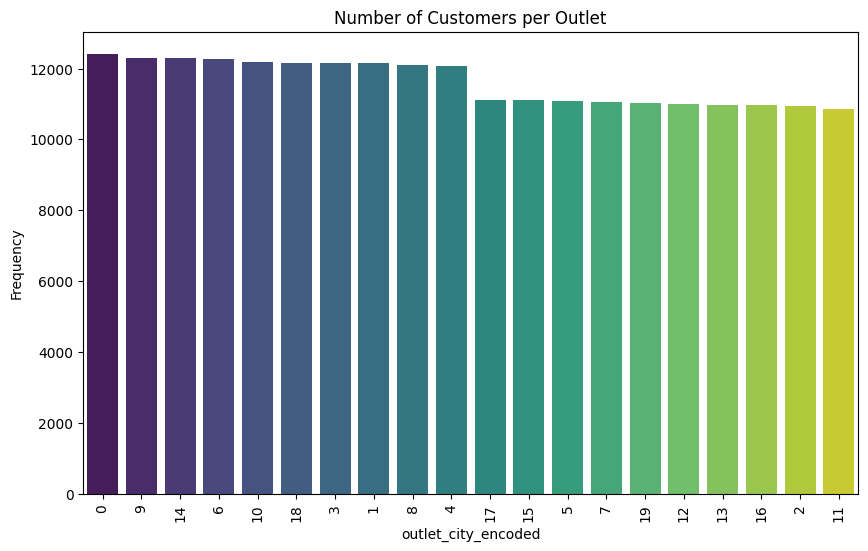

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x=x_test_final['outlet_city_encoded'], order=x_test_final['outlet_city_encoded'].value_counts().index, palette='viridis')
plt.xlabel('outlet_city_encoded')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title("Number of Customers per Outlet")
plt.show()

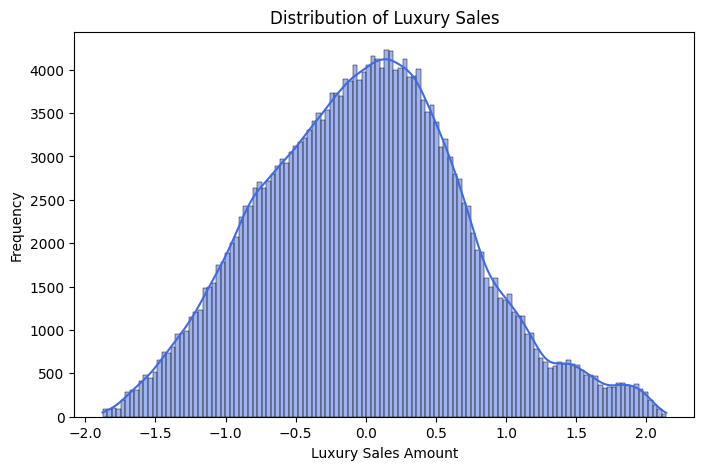

In [90]:
plt.figure(figsize=(8, 5))
sns.histplot(x_test_final['luxury_sales'], kde=True, color='royalblue')
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales Amount")
plt.ylabel("Frequency")
plt.show()

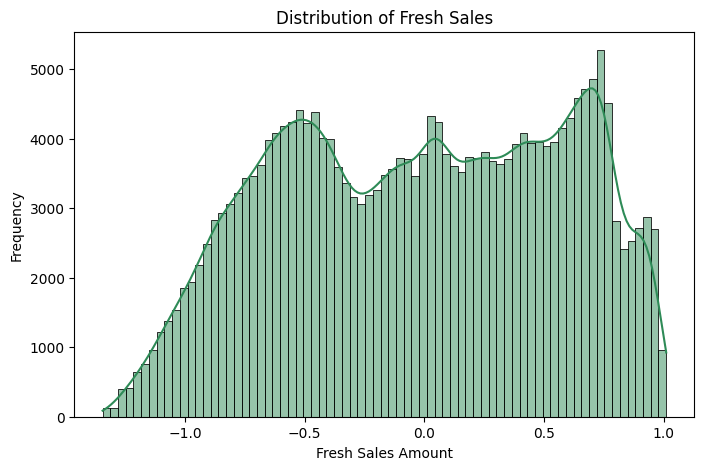

In [91]:
plt.figure(figsize=(8, 5))
sns.histplot(x_test_final['fresh_sales'], kde=True, color='seagreen')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales Amount")
plt.ylabel("Frequency")
plt.show()

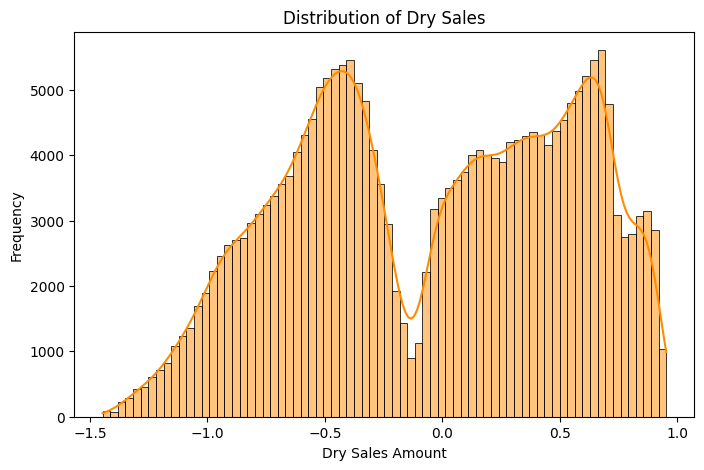

In [94]:
plt.figure(figsize=(8, 5))
sns.histplot(x_test_final['dry_sales'], kde=True, color='darkorange')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales Amount")
plt.ylabel("Frequency")
plt.show()

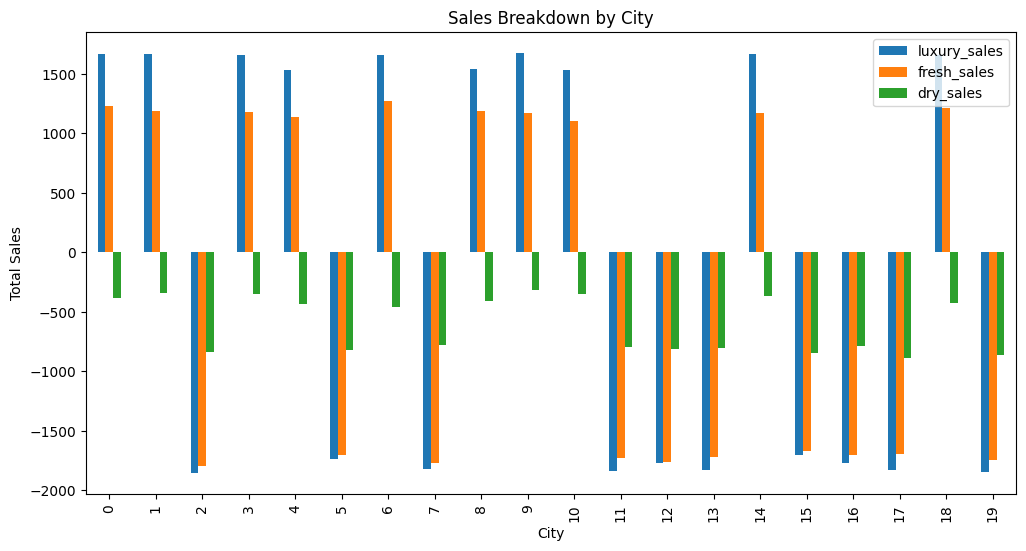

In [95]:
num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']
city_sales = x_test_final.groupby("outlet_city_encoded")[num_cols].sum()

city_sales.plot(kind='bar', figsize=(12, 6))
plt.title("Sales Breakdown by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

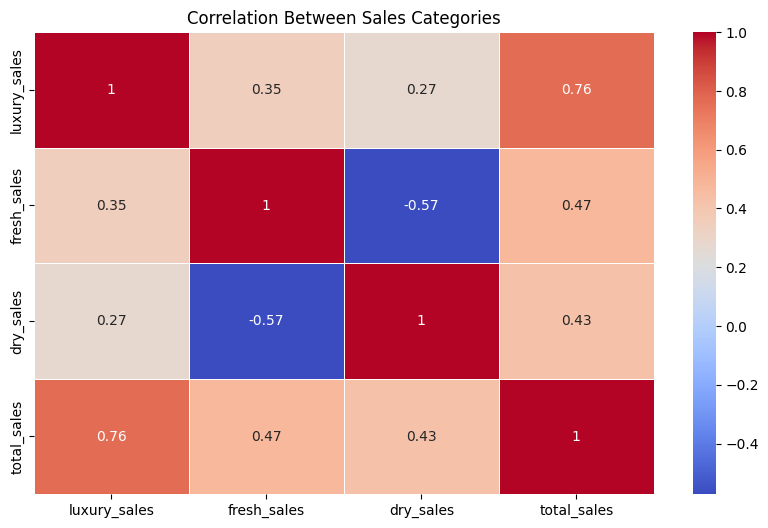

In [96]:
plt.figure(figsize=(10, 6))
sns.heatmap(x_test_final[['luxury_sales', 'fresh_sales', 'dry_sales', 'total_sales']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Sales Categories")
plt.show()

# **RandomForest Model**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [19]:
param_grid = {'n_estimators': [100, 300], 'max_depth': [None, 10, 30]}

random_forest_model = RandomForestClassifier()
grid_search = GridSearchCV(random_forest_model, param_grid, cv=2)
grid_search.fit(x_train_final, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 30],
                         'n_estimators': [100, 300]})

In [20]:
best_RF_model = grid_search.best_estimator_
print("Best Random Forest Hyperparameters:", grid_search.best_params_)

random_forest_y_pred = best_RF_model.predict(x_test_final)

Best Random Forest Hyperparameters: {'max_depth': None, 'n_estimators': 100}


In [21]:
accuracy_RF = accuracy_score(y_test, random_forest_y_pred)
precision_RF = precision_score(y_test, random_forest_y_pred, average='weighted')
recall_RF = recall_score(y_test, random_forest_y_pred, average='weighted')
f1_RF = f1_score(y_test, random_forest_y_pred, average='weighted')
classification_rep_RF = classification_report(y_test, random_forest_y_pred)
con_matrix_RF = confusion_matrix(y_test, random_forest_y_pred)

print("Accuracy:", accuracy_RF)
print("Precision:", precision_RF)
print("Recall:", recall_RF)
print("F1 Score:", f1_RF)
print("Classification Report:", "\n", classification_rep_RF)
print("Confusion Matrix:", "\n", con_matrix_RF)

Accuracy: 0.9990354971495496
Precision: 0.9990361153926607
Recall: 0.9990354971495496
F1 Score: 0.9990354467388849
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     56695
         2.0       1.00      1.00      1.00     46519
         3.0       1.00      1.00      1.00     14672
         4.0       1.00      1.00      1.00     51732
         5.0       1.00      1.00      1.00     11862
         6.0       1.00      1.00      1.00     50764

    accuracy                           1.00    232244
   macro avg       1.00      1.00      1.00    232244
weighted avg       1.00      1.00      1.00    232244

Confusion Matrix: 
 [[56653     2     1    37     1     1]
 [    1 46486     1     3     2    26]
 [    1     1 14664     1     4     1]
 [   30     0     1 51697     4     0]
 [    1     0    48     4 11806     3]
 [    0    40     5     4     1 50714]]


In [22]:
train_accuracy = accuracy_score(y_train, best_RF_model.predict(x_train_final))
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9999981546478883


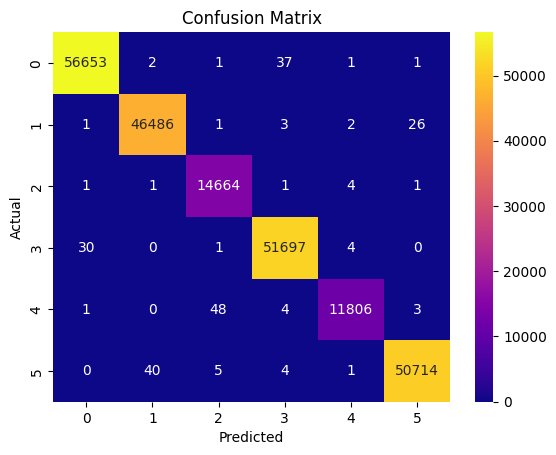

In [41]:
sns.heatmap(con_matrix_RF, annot=True, cmap='plasma', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_probs = best_RF_model.predict_proba(x_test_final)
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')
print("AUC Score:", auc_score)

AUC Score: 0.9998503381447609


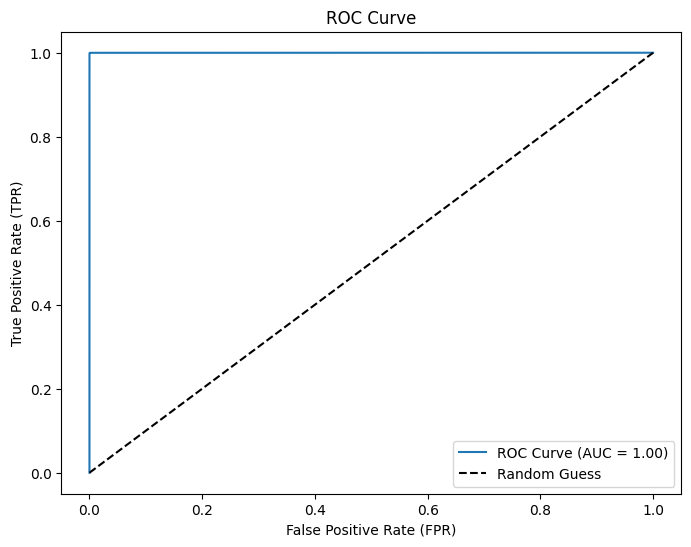

In [39]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# **Light GBM**

In [42]:
from lightgbm import LGBMClassifier

In [44]:
param_dist_lgbm = {'n_estimators': [100, 300], 'learning_rate': [0.01, 0.2]}

lgbm_model = LGBMClassifier()
lgbm_grid_search = GridSearchCV(lgbm_model, param_dist_lgbm, cv=2)
lgbm_grid_search.fit(x_train_final, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 270951, number of used features: 6
[LightGBM] [Info] Start training from score -1.410104
[LightGBM] [Info] Start training from score -1.607930
[LightGBM] [Info] Start training from score -2.761807
[LightGBM] [Info] Start training from score -1.501727
[LightGBM] [Info] Start training from score -2.974447
[LightGBM] [Info] Start training from score -1.520594
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1295
[LightGBM] [Info] Number of data points in the train set: 270951, number of used features: 6
[LightGBM] [Info] Start training from score -1.410119
[LightGBM] [Info] Start training from score 

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.2],
                         'n_estimators': [100, 300]})

In [52]:
best_lgbm_model = lgbm_grid_search.best_estimator_
print("Best LightGBM Hyperparameters:", lgbm_grid_search.best_params_)

lgbm_y_pred = best_lgbm_model.predict(x_test_final)

Best LightGBM Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 300}


In [56]:
accuracy_LGBM = accuracy_score(y_test, lgbm_y_pred)
precision_LGBM = precision_score(y_test, lgbm_y_pred, average='weighted')
recall_LGBM = recall_score(y_test, lgbm_y_pred, average='weighted')
f1_LGBM = f1_score(y_test, lgbm_y_pred, average='weighted')
classification_rep_LGBM = classification_report(y_test, lgbm_y_pred)
con_matrix_LGBM = confusion_matrix(y_test, lgbm_y_pred)

print("Accuracy:", accuracy_LGBM)
print("Precision:", precision_LGBM)
print("Recall:", recall_LGBM)
print("F1 Score:", f1_LGBM)
print("Classification Report:", "\n", classification_rep_LGBM)
print("Confusion Matrix:", "\n", con_matrix_LGBM)

Accuracy: 0.9995995590844112
Precision: 0.9995995772042738
Recall: 0.9995995590844112
F1 Score: 0.9995995611690963
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     56695
         2.0       1.00      1.00      1.00     46519
         3.0       1.00      1.00      1.00     14672
         4.0       1.00      1.00      1.00     51732
         5.0       1.00      1.00      1.00     11862
         6.0       1.00      1.00      1.00     50764

    accuracy                           1.00    232244
   macro avg       1.00      1.00      1.00    232244
weighted avg       1.00      1.00      1.00    232244

Confusion Matrix: 
 [[56682     2     3     6     1     1]
 [    4 46499     1     2     3    10]
 [    2     1 14665     1     2     1]
 [   16     0     1 51712     3     0]
 [    2     0     3     3 11851     3]
 [    0    12     5     4     1 50742]]


In [57]:
train_accuracy_lgbm = accuracy_score(y_train, best_lgbm_model.predict(x_train_final))
print("Training Accuracy:", train_accuracy_lgbm)

Training Accuracy: 0.9997268878874778


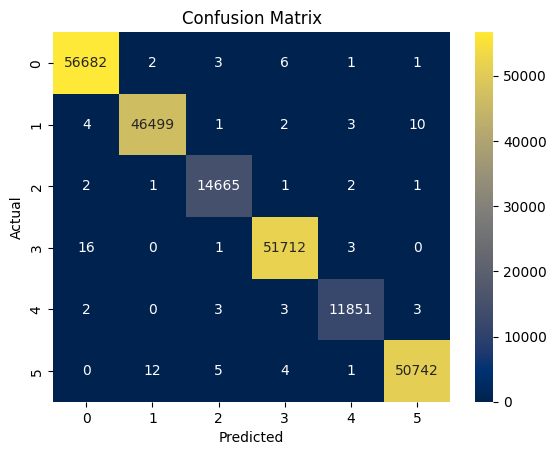

In [77]:
sns.heatmap(con_matrix_LGBM, annot=True, cmap='cividis', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
train_con_matrix_lgbm = confusion_matrix(y_train, best_lgbm_model.predict(x_train_final))
print("Confusion Matrix on Training Data:", "\n", train_con_matrix_lgbm)

Confusion Matrix on Training Data: 
 [[132265      2      5      8      0      7]
 [     9 108518      5      2      3      8]
 [     9      3  34217      0      4      2]
 [    12      3      5 120675      9      3]
 [     4      4      4      7  27653      6]
 [     4      5      4      4      7 118426]]


In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_probs_lgbm = best_lgbm_model.predict_proba(x_test_final)
lgbm_auc_score = roc_auc_score(y_test, y_probs_lgbm, multi_class='ovr')
print("AUC Score of LGBM model:", lgbm_auc_score)

AUC Score of LGBM model: 0.9998911848274356


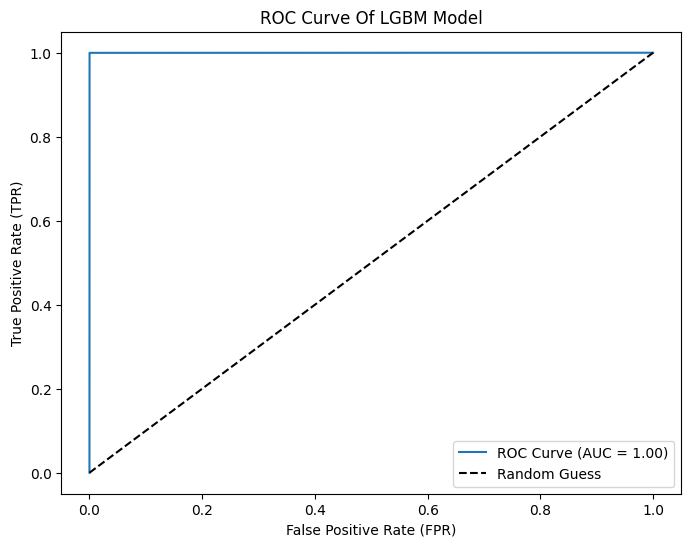

In [67]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr_LGBM, tpr_LGBM, _ = roc_curve(y_test_bin.ravel(), y_probs_lgbm.ravel())
roc_auc_lgbm = auc(fpr_LGBM, tpr_LGBM)

plt.figure(figsize=(8, 6))
plt.plot(fpr_LGBM, tpr_LGBM, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Of LGBM Model')
plt.legend()
plt.show()

# **Gradient Boosting Model**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
param_dist_GB = {'max_features': ['sqrt', 'log2'], 'learning_rate': [0.01, 0.2]}

gb_model = GradientBoostingClassifier()
gb_grid_search = GridSearchCV(gb_model, param_dist_GB, cv=2)
gb_grid_search.fit(x_train_final, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.2],
                         'max_features': ['sqrt', 'log2']})

In [72]:
best_gb_model = gb_grid_search.best_estimator_
print("Best Gradient Boosting Hyperparameters:", gb_grid_search.best_params_)

gb_y_pred = best_gb_model.predict(x_test_final)

Best Gradient Boosting Hyperparameters: {'learning_rate': 0.2, 'max_features': 'sqrt'}


In [74]:
accuracy_GB = accuracy_score(y_test, gb_y_pred)
precision_GB = precision_score(y_test, gb_y_pred, average='weighted')
recall_GB = recall_score(y_test, gb_y_pred, average='weighted')
f1_GB = f1_score(y_test, gb_y_pred, average='weighted')
classification_rep_GB = classification_report(y_test, gb_y_pred)
con_matrix_GB = confusion_matrix(y_test, gb_y_pred)

print("Accuracy:", accuracy_GB)
print("Precision:", precision_GB)
print("Recall:", recall_GB)
print("F1 Score:", f1_GB)
print("Classification Report:", "\n", classification_rep_GB)
print("Confusion Matrix:", "\n", con_matrix_GB)

Accuracy: 0.9996253939821912
Precision: 0.9996254252008251
Recall: 0.9996253939821912
F1 Score: 0.9996253953118135
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     56695
         2.0       1.00      1.00      1.00     46519
         3.0       1.00      1.00      1.00     14672
         4.0       1.00      1.00      1.00     51732
         5.0       1.00      1.00      1.00     11862
         6.0       1.00      1.00      1.00     50764

    accuracy                           1.00    232244
   macro avg       1.00      1.00      1.00    232244
weighted avg       1.00      1.00      1.00    232244

Confusion Matrix: 
 [[56681     3     3     6     1     1]
 [    1 46508     3     2     3     2]
 [    1     2 14657     2     4     6]
 [    5     1     1 51720     5     0]
 [    1     1    11     7 11840     2]
 [    0     2     6     4     1 50751]]


In [75]:
train_accuracy_gb = accuracy_score(y_train, best_gb_model.predict(x_train_final))
print("Training Accuracy:", train_accuracy_gb)

Training Accuracy: 0.9997231971832545


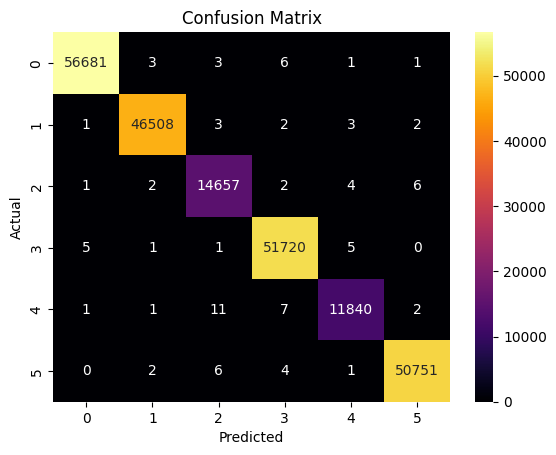

In [78]:
sns.heatmap(con_matrix_GB, annot=True, cmap='inferno', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [79]:
train_con_matrix_gb = confusion_matrix(y_train, best_gb_model.predict(x_train_final))
print("Confusion Matrix on Training Data:", "\n", train_con_matrix_gb)

Confusion Matrix on Training Data: 
 [[132258      2     12     10      0      5]
 [     1 108524      6      2      5      7]
 [     2      3  34218      4      4      4]
 [     5      8      3 120677     11      3]
 [     2      5      8      7  27649      7]
 [     3      3      7      6      5 118426]]


In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_probs_gb = best_gb_model.predict_proba(x_test_final)
gb_auc_score = roc_auc_score(y_test, y_probs_gb, multi_class='ovr')
print("AUC Score of Gradient Boosting model:", gb_auc_score)

AUC Score of Gradient Boosting model: 0.9997434725618376


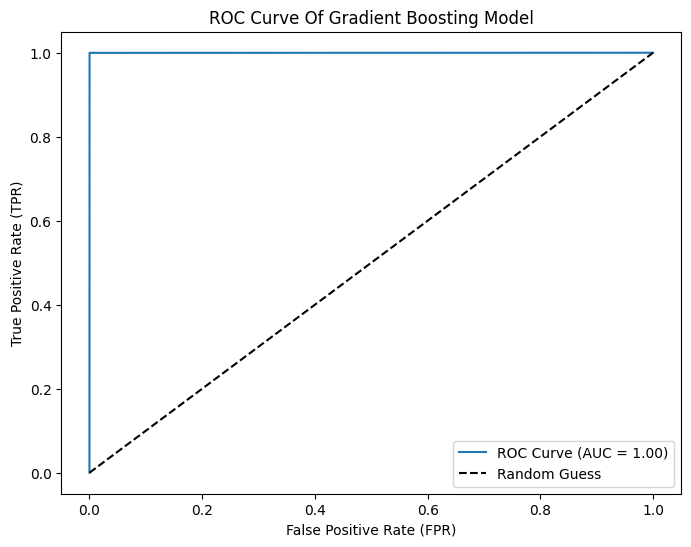

In [81]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr_GB, tpr_GB, _ = roc_curve(y_test_bin.ravel(), y_probs_gb.ravel())
roc_auc_gb = auc(fpr_GB, tpr_GB)

plt.figure(figsize=(8, 6))
plt.plot(fpr_GB, tpr_GB, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Of Gradient Boosting Model')
plt.legend()
plt.show()